In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

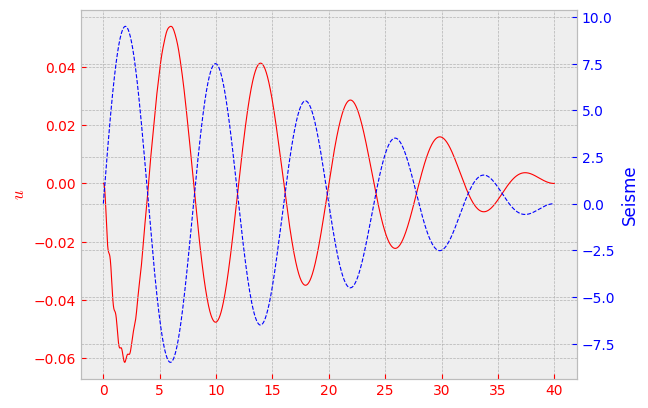

In [2]:
## Calcul de la reponse d'un systeme lineaire
## par la methode de l'interpolation de l'excitation (Chopra p.159)
## 
## Accelerogramme dans Seisme
## 
## interval de temps: dt
dt=1/100
## 
## nb de points: nb
nb=4000
t = np.arange(0,nb)*dt
Seisme = np.zeros(nb)
xmax = 10*np.pi
x = np.linspace(0,xmax,nb)
amplitude = 10
Seisme = np.sin(x)*(xmax - x) / xmax *amplitude
## 
## amortissement: z
z=5.0/100
## 
## frequence propre: f
f=2.0
## pulsation propre: w
w=2*np.pi*f
## 
## ****************************************************************
## Calcul des coefficients A,B,C,D,Ap,Bp,Cp,Dp
## ****************************************************************
## 
## calculs preliminaires
e=np.exp(-z*w*dt)
wd=w*np.sqrt(1-z**2)
wdt=wd*dt
Rz=np.sqrt(1-z**2)
## 
A=e*(z/Rz*np.sin(wdt)+np.cos(wdt))
B=e/wd*np.sin(wdt)
C=-1/w**2*(2*z/w/dt+e*(((1-2*z**2)/wdt-z/Rz)*np.sin(wdt)-(1+2*z/w/dt)*np.cos(wdt)))
D=-1/w**2*(1-2*z/(w*dt)+e*((2*z**2-1)/wdt*np.sin(wdt)+2*z/w/dt*np.cos(wdt)))
Ap=-e*(w/Rz*np.sin(wdt))
Bp=e*(np.cos(wdt)-z/Rz*np.sin(wdt))
Cp=-1/w**2*(-1/dt+e*((w/Rz+z/dt/Rz)*np.sin(wdt)+1/dt*np.cos(wdt)))
Dp=-1/w**2/dt*(1-e*(z/Rz*np.sin(wdt)+np.cos(wdt)))
## 
## ****************************************************************
## Calcul des deplacements et des vitesses
## ****************************************************************
## 
u = np.zeros(nb)
v = np.zeros(nb)
## 
for I in range(nb-1):
	u[I+1]=A*u[I]+B*v[I]+C*Seisme[I]+D*Seisme[I+1]
	v[I+1]=Ap*u[I]+Bp*v[I]+Cp*Seisme[I]+Dp*Seisme[I+1]
## 
## dessin de la reponse
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t,u,'r', linewidth=0.8)
ax1.set_ylabel('$u$')
ax1.yaxis.label.set_color('r')
ax1.tick_params(colors='r', which='both')

ax2.plot(t, Seisme, '--b', linewidth=0.8)
ax2.set_ylabel('Seisme')
ax2.yaxis.label.set_color('b')
ax2.tick_params(colors='b', which='both')

plt.show()
